In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

In [19]:
from tqdm.notebook import tqdm_notebook

In [16]:
data = pd.read_csv('all_province_train_2.csv')
data.head()
y_train = data.pop('PM2.5')
X_train = data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146856 entries, 0 to 146855
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        146856 non-null  int64  
 1   month       146856 non-null  int64  
 2   day         146856 non-null  int64  
 3   hour        146856 non-null  int64  
 4   temp        146856 non-null  float64
 5   wind speed  146856 non-null  float64
 6   wind dir    146856 non-null  float64
 7   lat         146856 non-null  float64
 8   long        146856 non-null  float64
 9   PM2.5       146856 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 11.2 MB


In [22]:
tscv = TimeSeriesSplit(n_splits=5)
i = 1
score = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    for mf in tqdm_notebook(np.linspace(1, 9, 9)):
        for ne in tqdm_notebook(np.linspace(50, 100, 6)):
            for md in np.linspace(20, 40, 5):
                for msl in np.linspace(30, 100, 8):
                    rfr = RandomForestRegressor(
                        max_features=int(mf),
                        n_estimators=int(ne),
                        max_depth=int(md),
                        min_samples_leaf=int(msl),
                        n_jobs = -1)
                    rfr.fit(X_tr, y_tr)
                    score.append([i,
                                  mf, 
                                  ne,
                                  md, 
                                  msl, 
                                  rfr.score(X_val, y_val)])
    i += 1

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [23]:
print(score)

[[1, 1.0, 50.0, 20.0, 30.0, 0.043029448290727634], [1, 1.0, 50.0, 20.0, 40.0, 0.0631776968168899], [1, 1.0, 50.0, 20.0, 50.0, 0.10141089155827876], [1, 1.0, 50.0, 20.0, 60.0, 0.07121012551974992], [1, 1.0, 50.0, 20.0, 70.0, 0.09951917873798621], [1, 1.0, 50.0, 20.0, 80.0, 0.07869659051871669], [1, 1.0, 50.0, 20.0, 90.0, 0.07199917690935331], [1, 1.0, 50.0, 20.0, 100.0, 0.10359962457039396], [1, 1.0, 50.0, 25.0, 30.0, 0.08269567146318091], [1, 1.0, 50.0, 25.0, 40.0, 0.06838429780543698], [1, 1.0, 50.0, 25.0, 50.0, 0.11449262828035989], [1, 1.0, 50.0, 25.0, 60.0, 0.06862069707975949], [1, 1.0, 50.0, 25.0, 70.0, 0.11177832734597404], [1, 1.0, 50.0, 25.0, 80.0, 0.10078608028450675], [1, 1.0, 50.0, 25.0, 90.0, 0.06880250438600055], [1, 1.0, 50.0, 25.0, 100.0, 0.07643343912387113], [1, 1.0, 50.0, 30.0, 30.0, 0.07356659334017535], [1, 1.0, 50.0, 30.0, 40.0, 0.0726618257165993], [1, 1.0, 50.0, 30.0, 50.0, 0.10969650005686427], [1, 1.0, 50.0, 30.0, 60.0, 0.0954960540722315], [1, 1.0, 50.0, 30.0

In [24]:
import pickle

with open('rf_score.pickle', 'wb') as fp:
    pickle.dump(score, fp)

In [26]:
with open ('rf_score.pickle', 'rb') as fp:
    score1 = pickle.load(fp)

In [28]:
import matplotlib.pyplot as plt

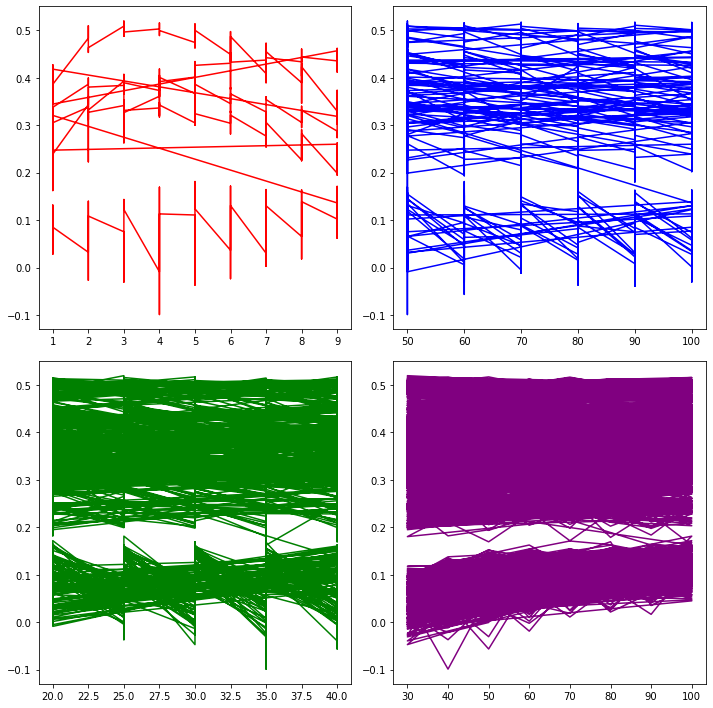

In [30]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout()

#create subplots
ax[0, 0].plot([i[1] for i in score],[i[-1] for i in score], color='red')
ax[0, 1].plot([i[2] for i in score],[i[-1] for i in score], color='blue')
ax[1, 0].plot([i[3] for i in score],[i[-1] for i in score], color='green')
ax[1, 1].plot([i[4] for i in score],[i[-1] for i in score], color='purple')
# plt.plot([i[1] for i in score],[i[-1] for i in score])

In [31]:
score2 = np.array(score)

In [32]:
np.argmax(score2, axis=0)

array([8640, 1920,  200,   32,    7, 9128])

In [33]:
score[9128]

[5, 3.0, 50.0, 25.0, 30.0, 0.5193660107817789]

In [43]:
tscv = TimeSeriesSplit(n_splits=3)
i = 1
score4 = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    
    for md in tqdm_notebook(np.linspace(10, 100, 10)):
        rfr = RandomForestRegressor(max_features = 3,n_estimators=200,max_depth=int(md),n_jobs = -1)
        rfr.fit(X_tr, y_tr)
        score4.append([i,md,rfr.score(X_val, y_val)])
    i += 1

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [41]:
score3

[[1, 50.0, 0.2156177115654574],
 [1, 102.77777777777777, 0.23787300326505179],
 [1, 155.55555555555554, 0.17275555007965593],
 [1, 208.33333333333334, 0.21914720076797722],
 [1, 261.1111111111111, 0.21825033542348304],
 [1, 313.8888888888889, 0.2073907727869334],
 [1, 366.6666666666667, 0.22331768877345404],
 [1, 419.44444444444446, 0.20261324456334928],
 [1, 472.22222222222223, 0.2184823889208537],
 [1, 525.0, 0.2046389466580868],
 [1, 577.7777777777778, 0.22882763565616593],
 [1, 630.5555555555555, 0.23657222799694588],
 [1, 683.3333333333334, 0.20865108085465411],
 [1, 736.1111111111111, 0.2202500029487594],
 [1, 788.8888888888889, 0.22246840576669846],
 [1, 841.6666666666666, 0.22049755455610764],
 [1, 894.4444444444445, 0.22517186158502467],
 [1, 947.2222222222223, 0.2258458350855599],
 [1, 1000.0, 0.22494511519842753],
 [2, 50.0, 0.3722922025757093],
 [2, 102.77777777777777, 0.23859482805518462],
 [2, 155.55555555555554, 0.2914801330088591],
 [2, 208.33333333333334, 0.29650828667

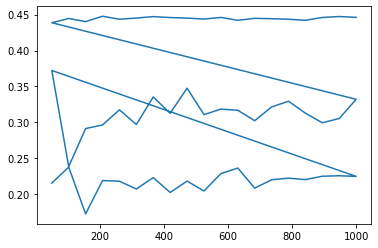

In [42]:
plt.plot([i[1] for i in score3],[i[-1] for i in score3])

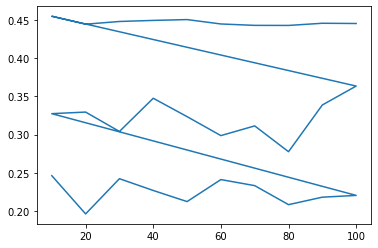

In [44]:
plt.plot([i[1] for i in score4],[i[-1] for i in score4])

In [47]:
from sklearn import metrics
tscv = TimeSeriesSplit(n_splits=3)
i = 1
score5 = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    
   
    rfr = RandomForestRegressor(max_features=3,
                        n_estimators=30,
                        max_depth=25,
                        min_samples_leaf=30,
                        n_jobs = -1,random_state=0)
    rfr.fit(X_tr, y_tr)
    y_pred = rfr.predict(X_val)
    score5.append([i,rfr.score(X_val, y_val),np.sqrt(metrics.mean_squared_error(y_val, y_pred))])
    i += 1

In [48]:
score5

[[1, 0.1583972674079417, 14.738471722636197],
 [2, 0.29981120081392354, 19.732412549778267],
 [3, 0.4571292782786298, 17.39744835129198]]